In [18]:
import numpy as np
import scipy.integrate as integrate

def one_compartment_model(t, y, dose, ka, ke, vc):
    C = y[0]
    A = y[1]
    if t >= 24:  # Check if dosing has occurred
        #dA_dt = -ka * A
        dC_dt = (dose / vc) * np.exp(-Ke * (time_point - n * tau)) - (ke * C)
    else:
        #dA_dt = 0
        dC_dt = 0
    return [dC_dt]

# Define parameters
dose = 100  # mg
#ka = 1.0  # 1/hr
ke = 0.2  # 1/hr
vc = 10  # L

# Time points
t_eval = np.linspace(0, 72, 1000)  # 72 hours (3 days)

# Initial conditions (C = 0, A = dose)
y0 = [0, dose]

# Solve the differential equation
sol = integrate.solve_ivp(one_compartment_model, [0, 72], y0, t_eval=t_eval, args=(dose, ka, ke, vc))

# Extract the drug concentration
C = sol.y[0]

# Plot the concentration-time profile
import matplotlib.pyplot as plt
plt.plot(t_eval, C)
plt.xlabel("Time (hours)")
plt.ylabel("Drug Concentration (mg/L)")
plt.title("One-Compartment Pharmacokinetic Model")

NameError: name 'ka' is not defined

[ 0.  0.  0. ...  0.  0. 10.]


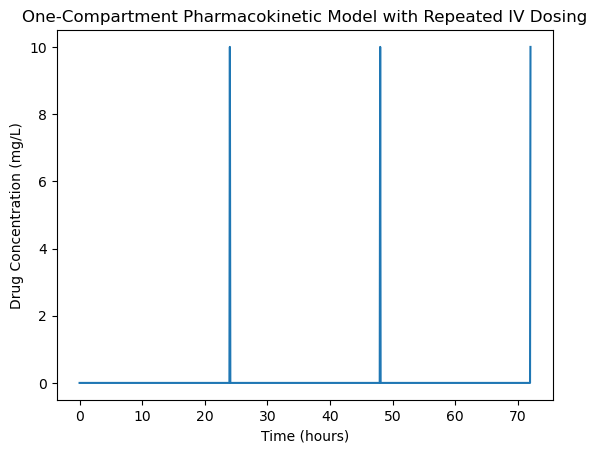

In [14]:
import numpy as np
import scipy.integrate as integrate
from scipy.signal import find_peaks

def one_compartment_model(t, C, dose, ke, vc):
    dC_dt = -ke * C
    return dC_dt

def dosing_schedule(t):
    return np.array([0 if t < 24 else dose for t in t])

# Define parameters
dose = 100  # mg
ke = 0.0678  # 1/hr
vc = 10  # L

# Time points
t_eval = np.linspace(0, 72, 1000)  # 72 hours (3 days)

# Initial condition (C = 0)
y0 = [0]

# Solve the differential equation with repeated dosing
def solve_with_dosing(t_eval, y0, dose, ke, vc):
    C = y0[0]
    sol = integrate.solve_ivp(one_compartment_model, [0, 72], [C], t_eval=t_eval, args=(dose, ke, vc))
    C_profile = sol.y[0]

    # Check for dosing times
    dosing_times = np.arange(24, 73, 12)
    for dosing_time in dosing_times:
        if dosing_time in t_eval:
            index = np.where(t_eval == dosing_time)[0][0]
            C_profile[index] += dose / vc

    return C_profile
print(C_profile)
C_profile = solve_with_dosing(t_eval, y0, dose, ke, vc)

# Plot the concentration-time profile
import matplotlib.pyplot as plt
plt.plot(t_eval, C_profile)
plt.xlabel("Time (hours)")
plt.ylabel("Drug Concentration (mg/L)")
plt.title("One-Compartment Pharmacokinetic Model with Repeated IV Dosing")
plt.show()

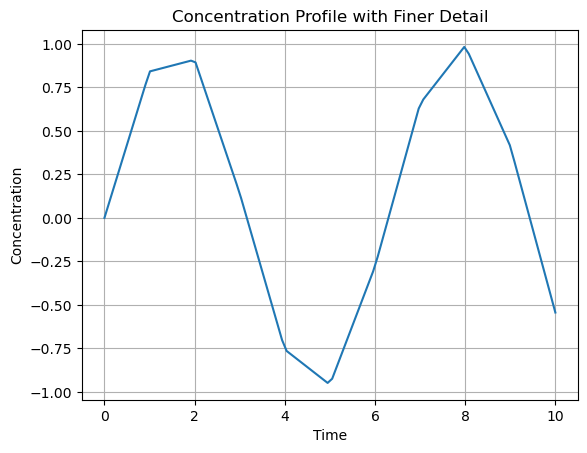

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
t = np.linspace(0, 10, 11)  # Time points (coarse)
C = np.sin(t)  # Concentration values

# Increase the number of data points for finer detail on the x-axis
t_fine = np.linspace(0, 10, 100)  # Time points (fine)

# Interpolate the concentration values
C_fine = np.interp(t_fine, t, C)

# Plot the concentration-time profile
plt.plot(t_fine, C_fine)
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Concentration Profile with Finer Detail")
plt.grid(True)
plt.show()

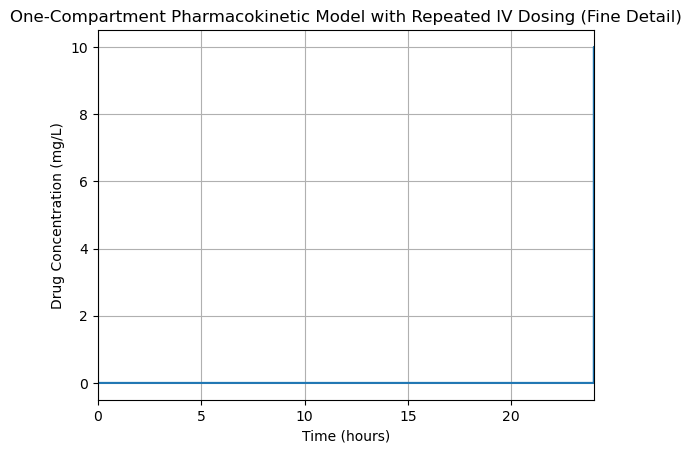

In [12]:
import numpy as np
import scipy.integrate as integrate
from scipy.signal import find_peaks

def one_compartment_model(t, C, dose, ke, vc):
    dC_dt = -ke * C
    return dC_dt

def dosing_schedule(t):
    return np.array([0 if t < 24 else dose for t in t])

# Define parameters
dose = 100  # mg
ke = 0.2  # 1/hr
vc = 10  # L

# Time points with fine detail
t_eval = np.linspace(0, 72, 10000)  # 72 hours (3 days) with 10000 points

# Initial condition (C = 0)
y0 = [0]

# Solve the differential equation with repeated dosing
def solve_with_dosing(t_eval, y0, dose, ke, vc):
    C = y0[0]
    sol = integrate.solve_ivp(one_compartment_model, [0, 72], [C], t_eval=t_eval, args=(dose, ke, vc))
    C_profile = sol.y[0]

    # Check for dosing times
    dosing_times = np.arange(24, 73, 12)
    for dosing_time in dosing_times:
        if dosing_time in t_eval:
            index = np.where(t_eval == dosing_time)[0][0]
            C_profile[index] += dose / vc

    return C_profile

C_profile = solve_with_dosing(t_eval, y0, dose, ke, vc)

# Plot the concentration-time profile with finer detail
import matplotlib.pyplot as plt
plt.plot(t_eval, C_profile)
plt.xlabel("Time (hours)")
plt.ylabel("Drug Concentration (mg/L)")
plt.title("One-Compartment Pharmacokinetic Model with Repeated IV Dosing (Fine Detail)")
plt.grid(True)
plt.xlim(0, 24)  # Adjust x-axis limits if needed
plt.show()

[ 0.  0.  0. ...  0.  0. 10.]


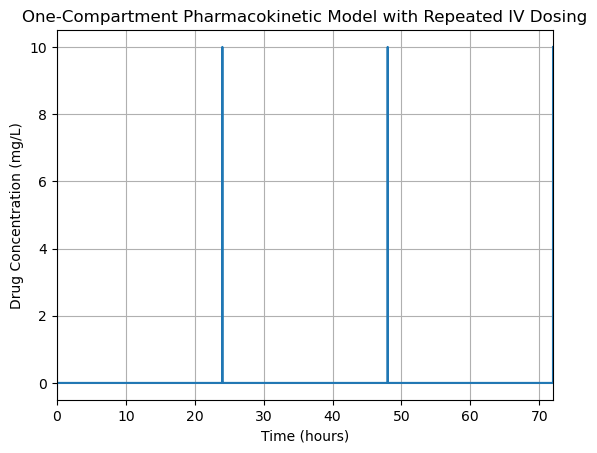

In [8]:
import numpy as np
import scipy.integrate as integrate

def one_compartment_model(t, C, dose, ke, vc):
    """
    Differential equation for a one-compartment pharmacokinetic model.

    Args:
        t: Time (hours).
        C: Drug concentration (mg/L).
        dose: Dose amount (mg).
        ke: Elimination rate constant (1/hour).
        vc: Volume of distribution (L).

    Returns:
        dC_dt: Rate of change of drug concentration (mg/L/hour).
    """
    dC_dt = -ke * C
    return dC_dt

def dosing_schedule(t, dose_interval, initial_delay):
    """
    Determines if a dose should be administered at a given time.

    Args:
        t: Time (hours).
        dose_interval: Interval between doses (hours).
        initial_delay: Delay before the first dose (hours).

    Returns:
        Dose to be administered (mg).
    """
    if t >= initial_delay and (t - initial_delay) % dose_interval == 0:
        return dose
    else:
        return 0

# Define parameters
dose = 100  # mg
ke = 0.2  # 1/hr
vc = 10  # L
dose_interval = 12  # hours
initial_delay = 24  # hours

# Time points with fine detail
t_eval = np.linspace(0, 72, 10000)  # 72 hours (3 days) with 10000 points

# Initial condition (C = 0)
y0 = [0]

# Solve the differential equation with repeated dosing
def solve_with_dosing(t_eval, y0, dose, ke, vc, dose_interval, initial_delay):
    C = y0[0]
    sol = integrate.solve_ivp(one_compartment_model, [0, 72], [C], t_eval=t_eval, args=(dose, ke, vc))
    C_profile = sol.y[0]

    # Check for dosing times and update concentration
    for t in t_eval:
        dose_to_administer = dosing_schedule(t, dose_interval, initial_delay)
        C_profile[np.where(t_eval == t)[0][0]] += dose_to_administer / vc

    return C_profile

C_profile = solve_with_dosing(t_eval, y0, dose, ke, vc, dose_interval, initial_delay)
print(C_profile)
# Plot the concentration-time profile
import matplotlib.pyplot as plt
plt.plot(t_eval, C_profile)
plt.xlabel("Time (hours)")
plt.ylabel("Drug Concentration (mg/L)")
plt.title("One-Compartment Pharmacokinetic Model with Repeated IV Dosing")
plt.grid(True)
plt.xlim(0, 72)  # Adjust x-axis limits if needed
plt.show()

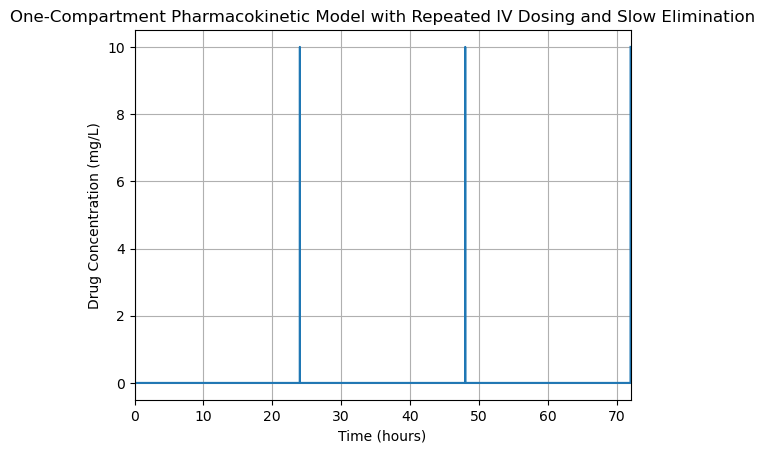

In [10]:
import numpy as np
import scipy.integrate as integrate

def one_compartment_model(t, C, dose, ke, vc, elimination_factor):
    """
    Differential equation for a one-compartment pharmacokinetic model with reduced elimination between doses.

    Args:
        t: Time (hours).
        C: Drug concentration (mg/L).
        dose: Dose amount (mg).
        ke: Elimination rate constant (1/hour).
        vc: Volume of distribution (L).
        elimination_factor: Factor to reduce elimination between doses (e.g., 0.5 for half elimination).

    Returns:
        dC_dt: Rate of change of drug concentration (mg/L/hour).
    """
    if dosing_schedule(t, dose_interval, initial_delay):
        dC_dt = -elimination_factor * ke * C
    else:
        dC_dt = -ke * C
    return dC_dt

def dosing_schedule(t, dose_interval, initial_delay):
    """
    Determines if a dose should be administered at a given time.

    Args:
        t: Time (hours).
        dose_interval: Interval between doses (hours).
        initial_delay: Delay before the first dose (hours).

    Returns:
        Dose to be administered (mg).
    """
    if t >= initial_delay and (t - initial_delay) % dose_interval == 0:
        return dose
    else:
        return 0

# Define parameters
dose = 100  # mg
ke = 0.2  # 1/hr
vc = 10  # L
dose_interval = 12  # hours
initial_delay = 24  # hours
elimination_factor = 0.5  # Reduce elimination between doses (e.g., 0.5 for half elimination)

# Time points with fine detail
t_eval = np.linspace(0, 72, 10000)  # 72 hours (3 days) with 10000 points

# Initial condition (C = 0)
y0 = [0]

# Solve the differential equation with repeated dosing
def solve_with_dosing(t_eval, y0, dose, ke, vc, dose_interval, initial_delay, elimination_factor):
    C = y0[0]
    sol = integrate.solve_ivp(one_compartment_model, [0, 72], [C], t_eval=t_eval, args=(dose, ke, vc, elimination_factor))
    C_profile = sol.y[0]

    # Check for dosing times and update concentration
    for t in t_eval:
        dose_to_administer = dosing_schedule(t, dose_interval, initial_delay)
        C_profile[np.where(t_eval == t)[0][0]] += dose_to_administer / vc

    return C_profile

C_profile = solve_with_dosing(t_eval, y0, dose, ke, vc, dose_interval, initial_delay, elimination_factor)

# Plot the concentration-time profile
import matplotlib.pyplot as plt
plt.plot(t_eval, C_profile)
plt.xlabel("Time (hours)")
plt.ylabel("Drug Concentration (mg/L)")
plt.title("One-Compartment Pharmacokinetic Model with Repeated IV Dosing and Slow Elimination")
plt.grid(True)
plt.xlim(0, 72)  # Adjust x-axis limits if needed
plt.show()